## dQ/dV Plotting

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Plotting every cycle of a specific cell:

#### First check the file:

In [4]:
file_path = r"C:FILEPATH.txt" #Make sure to use the exported .txt file with ALL CYCLES not an individual cycle dataset.
df = pd.read_csv(file_path, sep="\t", header=0) #header =2 if you have removed the 2 lines of EC-lab processing text (produced on creating a .txt file). Otherwise header =0.
df.head()

,time/s,cycle number,Ewe/V,I/mA,d(Q-Qo)/dE/mA.h/V,Unnamed: 5
0,0.000000,0.0,-0.048261,0.0,0.0,NaN
1,59.999998,0.0,-0.048147,0.0,0.0,NaN
2,119.999997,0.0,-0.048032,0.0,0.0,NaN
3,179.999995,0.0,-0.047994,0.0,0.0,NaN
4,239.999994,0.0,-0.048128,0.0,0.0,NaN


#### Now you can plot every cycle of that cell:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


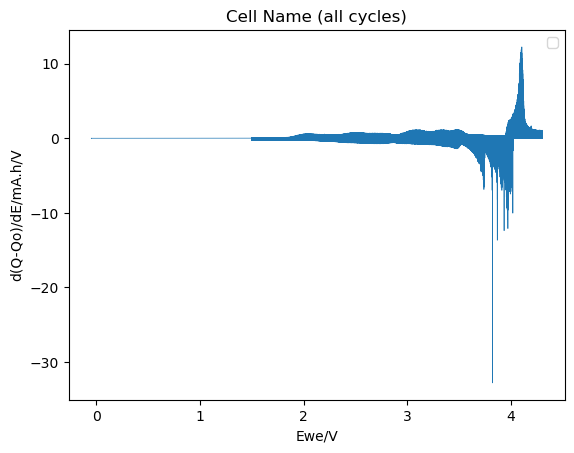

In [5]:


# Define the columns for x and y
x_column = "Ewe/V"
y_column = "d(Q-Qo)/dE/mA.h/V"
    
#     # Plot the data
plt.plot(df[x_column], df[y_column], linewidth=0.5) #label=f'Cycle {cycle_number}'

plt.xlabel('Ewe/V')
plt.ylabel('d(Q-Qo)/dE/mA.h/V')
plt.title('Cell Name (all cycles)')
plt.legend()
plt.show()


#### Plot every cycle in a different colour:

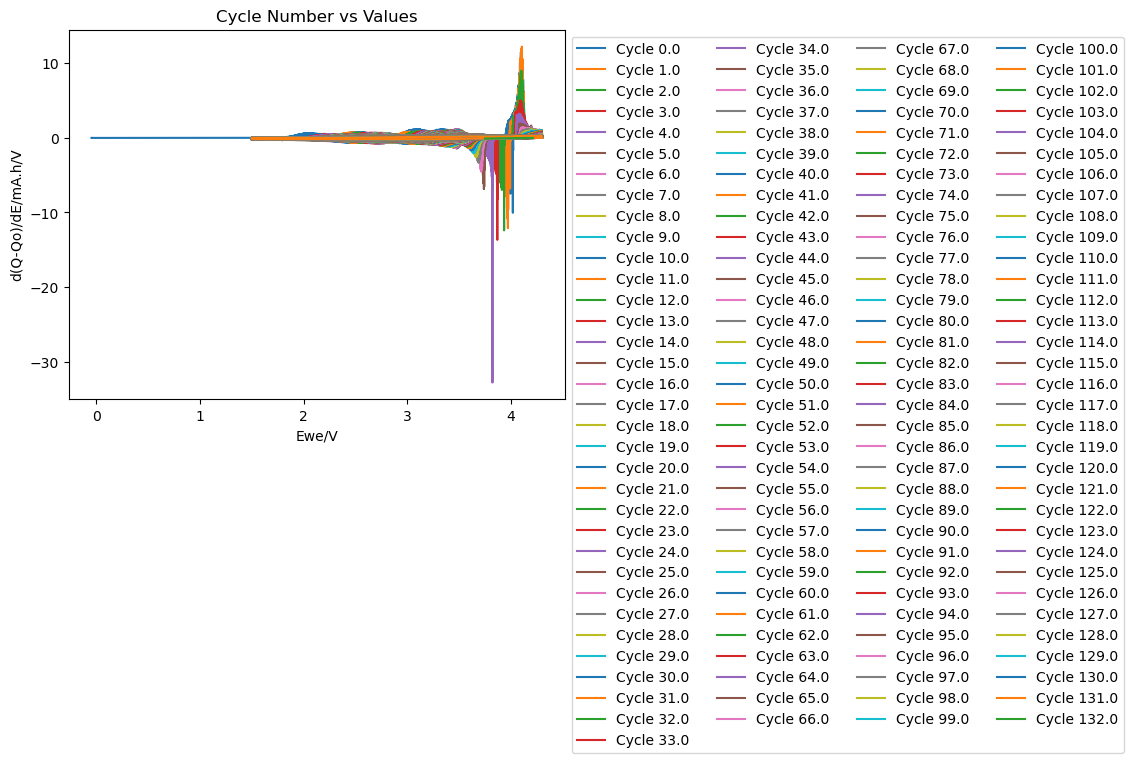

In [9]:
# Define the columns for x and y
x_column = "Ewe/V"
y_column = "d(Q-Qo)/dE/mA.h/V"

# Get unique cycle numbers
unique_cycle_numbers = df["cycle number"].unique()
#unique_cycle_numbers = [25]

# Plotting
plt.figure()

for cycle_number in unique_cycle_numbers:
    # Filter rows by cycle number
    filtered_df = df[df["cycle number"] == cycle_number]
    
    # Plot the data
    plt.plot(filtered_df[x_column], filtered_df[y_column], label=f'Cycle {cycle_number}')

plt.xlabel('Ewe/V')
plt.ylabel('d(Q-Qo)/dE/mA.h/V')
plt.title('Cycle Number vs Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=4)
plt.show()

## dQ/dV single cycle plots

#### Now we use the .py class file which has the plotting settings premade:
##### Make sure to use the file which has a single cycle extracted

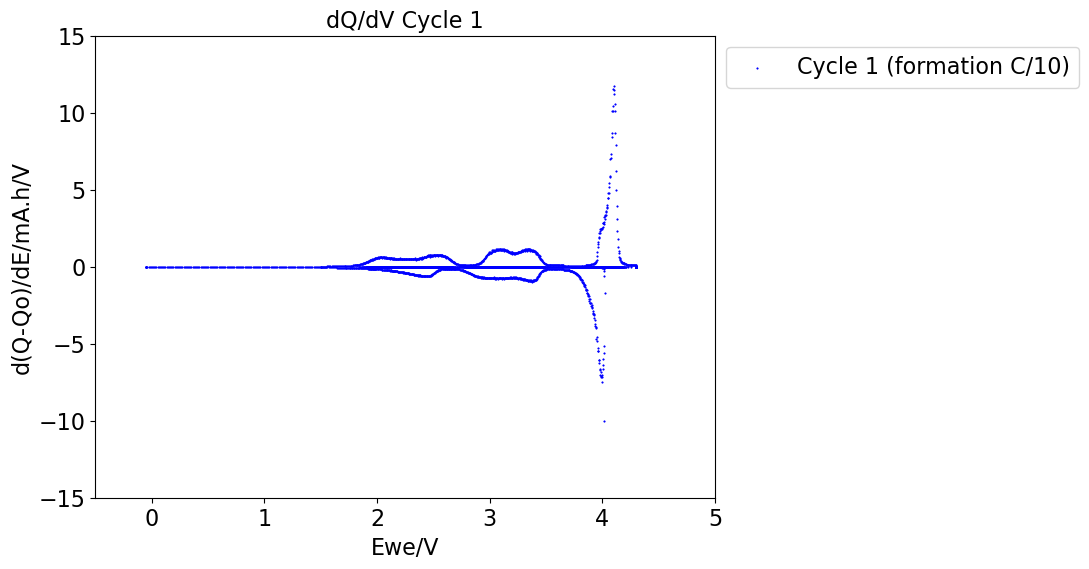

In [11]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
#folder_path = rf"C:" #this time navigate to the folder path not a specific data set. The data will be plotted in the order that the files are listed in the folder.
file_path = r"C:FILEPATH.txt" #single extracted cycle .txt file
dataset_name = "Muon P2 "
plot_title = "dQdV Plot"
legend_labels = ["Cycle 1 (formation C/10)"] 
plot = dQdVPlotter(file_path = file_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            legend_labels=legend_labels)
plot.dqdv_single_cycle()


#### Now to plot multiple extracted cycles with different colours use the folder path below
##### The folder path will plot the datasets in the order that they sit in the folder - order these if needed in your folder.

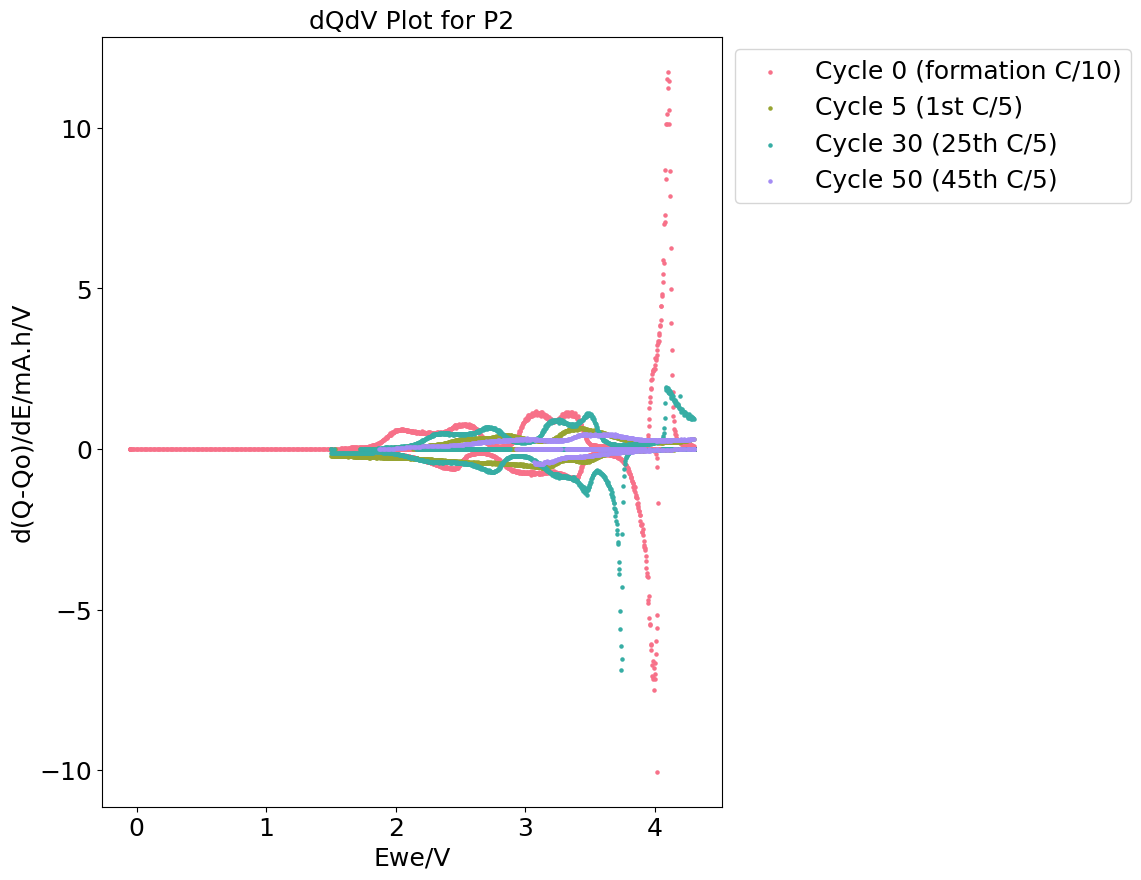

In [21]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
folder_path = rf"C:FOLDER PATH" #Not .txt file here
dataset_name = "Muon P2 Differential Capacity Plot"
plot_title = "dQdV Plot for P2"
figsize = (8, 10)
fontsize = 18
xlim = (-0.5, 5.5)
ylim = (-10.5, 12.5)
legend_labels = ["Cycle 0 (formation C/10)", "Cycle 5 (1st C/5)", "Cycle 30 (25th C/5)", "Cycle 50 (45th C/5)"] #have as many legend labels as number of .txt files in the folder path
plot = dQdVPlotter(folder_path = folder_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            figsize = figsize,
                            fontsize = fontsize,
                            xlim = xlim,
                            ylim = ylim,
                            legend_labels=legend_labels)
plot.dqdv_multiple_cycles()
